In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import umap.umap_ as umap
import time
from sklearn.preprocessing import minmax_scale
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from pandas import Series,DataFrame
import pandas as pd
import os
import tensorflow as tf
import keras
from copy import deepcopy
from scidrl.models import *
from scidrl.main import *
import argparse

Using TensorFlow backend.


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "01"
my_seed=1234
os.environ['PYTHONHASHSEED']=str(my_seed)
random.seed(my_seed)
np.random.seed(my_seed)
tf.random.set_seed(my_seed)
session_conf = tf.compat.v1.ConfigProto()
session_conf.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [3]:
# dirs="/data02/tguo/batch_effect/Pancreas/data_new/"
# data_file=dirs+"allmat.csv"
# meta_file=dirs+"allmeta.csv"

In [3]:
dirs="/data02/tguo/batch_effect/allorgan/new/"
dirs="/data02/tguo/batch_effect/Immune/"
dirs="/data02/tguo/batch_effect/Pancreas/data_new/"
dirs="/data02/tguo/batch_effect/PBMC/new/"
# dirs="/data02/tguo/batch_effect/cerebral_organoids/new/"
# dirs="/data02/tguo/batch_effect/Pancreas/new/"
# dirs="/data02/tguo/batch_effect/PBMC_Inteferon/new/"
# dirs="/data02/tguo/batch_effect/stomach_cancer/"
# dirs="/data02/tguo/space_batch_effect/breast_cancer/scRNA/"
# dirs="/data02/tguo/batch_effect/DC/new/"
# data_file=dirs+"scRNA_10X-V1_mat.csv"
# meta_file=dirs+"scRNA_10X-V1_meta.csv"
data_file=dirs+"allmat.csv"
meta_file=dirs+"allmeta.csv"
# data_file=dirs+"correct_scidrl_1.csv"
# meta_file=dirs+"meta_scidrl_1.csv"

In [4]:
# for lambdas in np.arange(0.6,1,0.1):
#     parser = argparse.ArgumentParser()
#     parser.add_argument('--zdim', type=int, default=16, help='Dim of embedding.')
#     parser.add_argument('--znoise_dim', type=int, default=2, help='Dim of noise embedding.')
#     parser.add_argument('--epochs', type=int, default=500, help='Number of epochs to train.')
#     parser.add_argument('--batch_size', type=int, default=100, help='Size of batches to train.')
#     parser.add_argument('--lr', type=float, default=1e-3, help='Initial learning rate.')
#     parser.add_argument('--gamma', type=float, default=1, help='Weight of classifier loss.')
#     parser.add_argument('--fg_lambda', type=float, default=lambdas, help='Weight of GRL.')
#     parser.add_argument('--acts', type=str, default='softmax', help='Activity function of classifier and discriminator')
#     parser.add_argument('--minmaxscale', type=bool, default=True, help='minmax scaling of data')
#     params,unknown=parser.parse_known_args()

#     if not os.path.isdir(dirs+"model/"):
#         os.makedirs(dirs+"model/")
#     model_file=dirs+"model/model_"+str(params.fg_lambda)+'-'+str(params.batch_size)+'-'+str(params.epochs)+".h5"
#     scidrl=SCIDRL_train(params,data_file,meta_file)
#     loss=scidrl.train()
#     embed,correct=scidrl.infer()
#     a=loss[list(loss.keys())[-2]]
#     np.savetxt(dirs+"disc_loss_"+str(scidrl.params.fg_lambda)+".csv",a,fmt='%.5f')
#     names=['SCIDRL'+str(i) for i in np.arange(embed.shape[1])]
#     embed1=pd.DataFrame(embed,index=scidrl.meta.index,columns=names)
#     embed1.to_csv(dirs+"data_scidrl_"+str(scidrl.params.fg_lambda)+".csv")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/home/tguo/tguo2/miniconda3/envs/tf2x/lib/python3.6/site-packages/keras/engine/training_utils.py:819: UserWarning: Output myCustomLossLayerReconstruction missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to myCustomLossLayerReconstruction.
  'be expecting any data to be passed to {0}.'.format(name))
/home/tguo/tguo2/miniconda3/envs/tf2x/lib/python3.6/site-packages/keras/engine/training_utils.py:819: UserWarning: Output myCoustomLossLayerClassifier missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to myCoustomLossLayerClassifier.
  'be expecting any data to be passed to {0}.'.format(name))
/home/tguo/tguo2/miniconda3/envs/tf2x/lib/python3.6/site-packages/keras/engine/training_utils.py:819: UserWarning: Output myCoustomLossLayerAdversarial missing from loss dictionary. We assume this was done on purpose. The fit and ev

Epoch 1/500
 - 7s - loss: 564.9300
Epoch 2/500
 - 6s - loss: 479.8085
Epoch 3/500
 - 7s - loss: 474.5009
Epoch 4/500
 - 6s - loss: 471.6410
Epoch 5/500
 - 7s - loss: 469.7152
Epoch 6/500
 - 6s - loss: 468.4642
Epoch 7/500
 - 6s - loss: 467.4999
Epoch 8/500
 - 6s - loss: 466.6956
Epoch 9/500
 - 7s - loss: 466.1245
Epoch 10/500
 - 6s - loss: 465.5637
Epoch 11/500
 - 6s - loss: 465.1392
Epoch 12/500
 - 7s - loss: 464.6918
Epoch 13/500
 - 7s - loss: 464.3729
Epoch 14/500
 - 6s - loss: 464.0357
Epoch 15/500
 - 6s - loss: 463.7591
Epoch 16/500
 - 6s - loss: 463.5284
Epoch 17/500
 - 6s - loss: 463.2789
Epoch 18/500
 - 6s - loss: 463.0589
Epoch 19/500
 - 6s - loss: 462.8465
Epoch 20/500
 - 6s - loss: 462.7033
Epoch 21/500
 - 6s - loss: 462.5520
Epoch 22/500
 - 6s - loss: 462.3526
Epoch 23/500
 - 6s - loss: 462.1994
Epoch 24/500
 - 6s - loss: 462.0879
Epoch 25/500
 - 6s - loss: 461.9418
Epoch 26/500
 - 6s - loss: 461.8567
Epoch 27/500
 - 6s - loss: 461.7214
Epoch 28/500
 - 7s - loss: 461.6733
E

 - 7s - loss: 457.6766
Epoch 226/500
 - 7s - loss: 457.6973
Epoch 227/500
 - 7s - loss: 457.6793
Epoch 228/500
 - 6s - loss: 457.6536
Epoch 229/500
 - 7s - loss: 457.6477
Epoch 230/500
 - 7s - loss: 457.6388
Epoch 231/500
 - 7s - loss: 457.6486
Epoch 232/500
 - 7s - loss: 457.6197
Epoch 233/500
 - 7s - loss: 457.6036
Epoch 234/500
 - 7s - loss: 457.6307
Epoch 235/500
 - 7s - loss: 457.5788
Epoch 236/500
 - 7s - loss: 457.5974
Epoch 237/500
 - 7s - loss: 457.6575
Epoch 238/500
 - 6s - loss: 457.6130
Epoch 239/500
 - 6s - loss: 457.6020
Epoch 240/500
 - 6s - loss: 457.5963
Epoch 241/500
 - 7s - loss: 457.6046
Epoch 242/500
 - 7s - loss: 457.5799
Epoch 243/500
 - 7s - loss: 457.5563
Epoch 244/500
 - 6s - loss: 457.5887
Epoch 245/500
 - 7s - loss: 457.5627
Epoch 246/500
 - 6s - loss: 457.5856
Epoch 247/500
 - 6s - loss: 457.6210
Epoch 248/500
 - 6s - loss: 457.6005
Epoch 249/500
 - 7s - loss: 457.5282
Epoch 250/500
 - 7s - loss: 457.5664
Epoch 251/500
 - 7s - loss: 457.5878
Epoch 252/500
 

Epoch 456/500
 - 6s - loss: 456.9082
Epoch 457/500
 - 7s - loss: 456.9133
Epoch 458/500
 - 7s - loss: 456.9212
Epoch 459/500
 - 6s - loss: 456.9076
Epoch 460/500
 - 6s - loss: 456.9306
Epoch 461/500
 - 6s - loss: 456.9297
Epoch 462/500
 - 7s - loss: 456.8635
Epoch 463/500
 - 7s - loss: 456.8417
Epoch 464/500
 - 7s - loss: 456.8728
Epoch 465/500
 - 6s - loss: 456.9076
Epoch 466/500
 - 6s - loss: 456.8782
Epoch 467/500
 - 7s - loss: 456.9005
Epoch 468/500
 - 7s - loss: 456.9023
Epoch 469/500
 - 7s - loss: 456.8666
Epoch 470/500
 - 7s - loss: 456.8993
Epoch 471/500
 - 6s - loss: 456.8777
Epoch 472/500
 - 6s - loss: 456.8927
Epoch 473/500
 - 7s - loss: 456.8696
Epoch 474/500
 - 7s - loss: 456.8721
Epoch 475/500
 - 6s - loss: 456.8610
Epoch 476/500
 - 6s - loss: 456.8854
Epoch 477/500
 - 7s - loss: 456.8433
Epoch 478/500
 - 7s - loss: 456.8774
Epoch 479/500
 - 7s - loss: 456.8632
Epoch 480/500
 - 7s - loss: 456.8524
Epoch 481/500
 - 6s - loss: 456.8480
Epoch 482/500
 - 7s - loss: 456.8442
E

In [4]:
parser = argparse.ArgumentParser()
parser.add_argument('--zdim', type=int, default=32, help='Dim of embedding.')
parser.add_argument('--znoise_dim', type=int, default=4, help='Dim of noise embedding.')
parser.add_argument('--epochs', type=int, default=2000, help='Number of epochs to train.')
parser.add_argument('--batch_size', type=int, default=100, help='Size of batches to train.')
parser.add_argument('--lr', type=float, default=1e-3, help='Initial learning rate.')
parser.add_argument('--gamma', type=float, default=1, help='Weight of classifier loss.')
parser.add_argument('--fg_lambda', type=float, default=0.1, help='Weight of GRL.')
parser.add_argument('--acts', type=str, default='sigmoid', help='Activity function of classifier and discriminator')
parser.add_argument('--minmaxscale', type=bool, default=True, help='minmax scaling of data')
params,unknown=parser.parse_known_args()

if not os.path.isdir(dirs+"model/"):
    os.makedirs(dirs+"model/")
model_file=dirs+"model/model_"+str(params.fg_lambda)+'-'+str(params.batch_size)+'-'+str(params.epochs)+".h5"

In [ ]:
scidrl=SCIDRL_train(params,data_file,meta_file)
loss=scidrl.train()
embed,correct=scidrl.infer()
# scidrl.model_save(model_file)
names=['SCIDRL'+str(i) for i in np.arange(embed.shape[1])]
embed1=pd.DataFrame(embed,index=scidrl.meta.index,columns=names)
embed1.to_csv(dirs+'data_scidrl.csv')
correct1=pd.DataFrame(correct,index=scidrl.data.index,columns=scidrl.data.columns)
correct1.to_csv(dirs+'correct_scidrl.csv')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/home/tguo/tguo2/miniconda3/envs/tf2x/lib/python3.6/site-packages/keras/engine/training_utils.py:819: UserWarning: Output myCustomLossLayerReconstruction missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to myCustomLossLayerReconstruction.
  'be expecting any data to be passed to {0}.'.format(name))
/home/tguo/tguo2/miniconda3/envs/tf2x/lib/python3.6/site-packages/keras/engine/training_utils.py:819: UserWarning: Output myCoustomLossLayerClassifier missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to myCoustomLossLayerClassifier.
  'be expecting any data to be passed to {0}.'.format(name))
/home/tguo/tguo2/miniconda3/envs/tf2x/lib/python3.6/site-packages/keras/engine/training_utils.py:819: UserWarning: Output myCoustomLossLayerAdversarial missing from loss dictionary. We assume this was done on purpose. The fit and ev

Epoch 1/2000
 - 1s - loss: 1860.0494
Epoch 2/2000
 - 0s - loss: 1199.8736
Epoch 3/2000
 - 0s - loss: 783.0868
Epoch 4/2000
 - 0s - loss: 545.5921
Epoch 5/2000
 - 0s - loss: 414.8998
Epoch 6/2000
 - 0s - loss: 341.5483
Epoch 7/2000
 - 0s - loss: 296.7861
Epoch 8/2000
 - 0s - loss: 269.9154
Epoch 9/2000
 - 0s - loss: 254.9273
Epoch 10/2000
 - 0s - loss: 240.9936
Epoch 11/2000
 - 0s - loss: 230.8962
Epoch 12/2000
 - 0s - loss: 224.3953
Epoch 13/2000
 - 0s - loss: 219.2834
Epoch 14/2000
 - 0s - loss: 214.5548
Epoch 15/2000
 - 0s - loss: 212.0435
Epoch 16/2000
 - 0s - loss: 208.9712
Epoch 17/2000
 - 0s - loss: 208.1278
Epoch 18/2000
 - 0s - loss: 204.5667
Epoch 19/2000
 - 0s - loss: 203.4828
Epoch 20/2000
 - 0s - loss: 202.0211
Epoch 21/2000
 - 0s - loss: 200.7121
Epoch 22/2000
 - 0s - loss: 199.8798
Epoch 23/2000
 - 0s - loss: 199.2672
Epoch 24/2000
 - 0s - loss: 197.7337
Epoch 25/2000
 - 0s - loss: 196.8666
Epoch 26/2000
 - 0s - loss: 196.0356
Epoch 27/2000
 - 0s - loss: 196.3864
Epoch 28

 - 0s - loss: 177.4978
Epoch 220/2000
 - 0s - loss: 177.4174
Epoch 221/2000
 - 0s - loss: 177.4689
Epoch 222/2000
 - 0s - loss: 177.2271
Epoch 223/2000
 - 0s - loss: 177.2897
Epoch 224/2000
 - 0s - loss: 176.9395
Epoch 225/2000
 - 0s - loss: 177.0453
Epoch 226/2000
 - 0s - loss: 177.0679
Epoch 227/2000
 - 0s - loss: 177.3254
Epoch 228/2000
 - 0s - loss: 176.8796
Epoch 229/2000
 - 0s - loss: 176.7309
Epoch 230/2000
 - 0s - loss: 176.6403
Epoch 231/2000
 - 0s - loss: 176.5278
Epoch 232/2000
 - 0s - loss: 176.6872
Epoch 233/2000
 - 0s - loss: 176.5803
Epoch 234/2000
 - 0s - loss: 176.5193
Epoch 235/2000
 - 0s - loss: 176.4016
Epoch 236/2000
 - 0s - loss: 176.3662
Epoch 237/2000
 - 0s - loss: 176.3193
Epoch 238/2000
 - 0s - loss: 176.1616
Epoch 239/2000
 - 0s - loss: 176.1446
Epoch 240/2000
 - 0s - loss: 176.0399
Epoch 241/2000
 - 0s - loss: 175.9941
Epoch 242/2000
 - 0s - loss: 176.3425
Epoch 243/2000
 - 0s - loss: 175.6148
Epoch 244/2000
 - 0s - loss: 175.8468
Epoch 245/2000
 - 0s - loss

Epoch 435/2000
 - 0s - loss: 164.5673
Epoch 436/2000
 - 0s - loss: 163.9997
Epoch 437/2000
 - 0s - loss: 163.8032
Epoch 438/2000
 - 0s - loss: 163.8439
Epoch 439/2000
 - 0s - loss: 163.5181
Epoch 440/2000
 - 0s - loss: 163.6650
Epoch 441/2000
 - 0s - loss: 163.4986
Epoch 442/2000
 - 0s - loss: 163.6439
Epoch 443/2000
 - 0s - loss: 163.4394
Epoch 444/2000
 - 0s - loss: 163.6036
Epoch 445/2000
 - 0s - loss: 163.4084
Epoch 446/2000
 - 0s - loss: 163.3334
Epoch 447/2000
 - 0s - loss: 163.1073
Epoch 448/2000
 - 0s - loss: 163.1263
Epoch 449/2000
 - 0s - loss: 163.1850
Epoch 450/2000
 - 0s - loss: 162.8728
Epoch 451/2000
 - 0s - loss: 162.8230
Epoch 452/2000
 - 0s - loss: 163.0469
Epoch 453/2000
 - 0s - loss: 163.0133
Epoch 454/2000
 - 0s - loss: 162.9049
Epoch 455/2000
 - 0s - loss: 163.0144
Epoch 456/2000
 - 0s - loss: 162.4034
Epoch 457/2000
 - 0s - loss: 162.7816
Epoch 458/2000
 - 0s - loss: 162.5458
Epoch 459/2000
 - 0s - loss: 162.6640
Epoch 460/2000
 - 0s - loss: 162.6396
Epoch 461/20

Epoch 651/2000
 - 0s - loss: 152.0430
Epoch 652/2000
 - 0s - loss: 151.8963
Epoch 653/2000
 - 0s - loss: 151.6509
Epoch 654/2000
 - 0s - loss: 151.8530
Epoch 655/2000
 - 0s - loss: 151.6826
Epoch 656/2000
 - 0s - loss: 151.8549
Epoch 657/2000
 - 0s - loss: 151.3279
Epoch 658/2000
 - 0s - loss: 151.8559
Epoch 659/2000
 - 0s - loss: 151.3098
Epoch 660/2000
 - 0s - loss: 151.3703
Epoch 661/2000
 - 0s - loss: 151.4113
Epoch 662/2000
 - 0s - loss: 151.5464
Epoch 663/2000
 - 0s - loss: 151.3961
Epoch 664/2000
 - 0s - loss: 151.5662
Epoch 665/2000
 - 0s - loss: 151.5153
Epoch 666/2000
 - 0s - loss: 151.2466
Epoch 667/2000
 - 0s - loss: 151.0549
Epoch 668/2000
 - 0s - loss: 151.3355
Epoch 669/2000
 - 0s - loss: 151.3409
Epoch 670/2000
 - 0s - loss: 150.9900
Epoch 671/2000
 - 0s - loss: 150.9057
Epoch 672/2000
 - 0s - loss: 151.1292
Epoch 673/2000
 - 0s - loss: 150.8545
Epoch 674/2000
 - 0s - loss: 150.9347
Epoch 675/2000
 - 0s - loss: 150.9066
Epoch 676/2000
 - 0s - loss: 150.7340
Epoch 677/20

Epoch 867/2000
 - 0s - loss: 144.5994
Epoch 868/2000
 - 0s - loss: 144.3548
Epoch 869/2000
 - 0s - loss: 144.3533
Epoch 870/2000
 - 0s - loss: 144.3443
Epoch 871/2000
 - 0s - loss: 144.2966
Epoch 872/2000
 - 0s - loss: 144.0763
Epoch 873/2000
 - 0s - loss: 144.0328
Epoch 874/2000
 - 0s - loss: 144.0378
Epoch 875/2000
 - 0s - loss: 144.2656
Epoch 876/2000
 - 0s - loss: 143.9141
Epoch 877/2000
 - 0s - loss: 143.9019
Epoch 878/2000
 - 0s - loss: 144.0391
Epoch 879/2000
 - 0s - loss: 143.8765
Epoch 880/2000
 - 0s - loss: 143.8546
Epoch 881/2000
 - 0s - loss: 144.0519
Epoch 882/2000
 - 0s - loss: 143.6632
Epoch 883/2000
 - 0s - loss: 143.8237
Epoch 884/2000
 - 0s - loss: 144.0177
Epoch 885/2000
 - 0s - loss: 143.9566
Epoch 886/2000
 - 0s - loss: 143.9659
Epoch 887/2000
 - 0s - loss: 143.8122
Epoch 888/2000
 - 0s - loss: 143.8755
Epoch 889/2000
 - 0s - loss: 144.0788
Epoch 890/2000
 - 0s - loss: 143.6333
Epoch 891/2000
 - 0s - loss: 143.8650
Epoch 892/2000
 - 0s - loss: 143.7670
Epoch 893/20

Epoch 1081/2000
 - 0s - loss: 140.2590
Epoch 1082/2000
 - 0s - loss: 140.1568
Epoch 1083/2000
 - 0s - loss: 140.0104
Epoch 1084/2000
 - 0s - loss: 139.7941
Epoch 1085/2000
 - 0s - loss: 139.7922
Epoch 1086/2000
 - 0s - loss: 139.6694
Epoch 1087/2000
 - 0s - loss: 140.0128
Epoch 1088/2000
 - 0s - loss: 139.7063
Epoch 1089/2000
 - 0s - loss: 140.0706
Epoch 1090/2000
 - 0s - loss: 139.9044
Epoch 1091/2000
 - 0s - loss: 139.9470
Epoch 1092/2000
 - 0s - loss: 139.6542
Epoch 1093/2000
 - 0s - loss: 139.6688
Epoch 1094/2000
 - 0s - loss: 140.3691
Epoch 1095/2000
 - 0s - loss: 139.9512
Epoch 1096/2000
 - 0s - loss: 140.2054
Epoch 1097/2000
 - 0s - loss: 139.7251
Epoch 1098/2000
 - 0s - loss: 139.9137
Epoch 1099/2000
 - 0s - loss: 139.7085
Epoch 1100/2000
 - 0s - loss: 139.6980
Epoch 1101/2000
 - 0s - loss: 140.0314
Epoch 1102/2000
 - 0s - loss: 140.0483
Epoch 1103/2000
 - 0s - loss: 140.0633
Epoch 1104/2000
 - 0s - loss: 139.5046
Epoch 1105/2000
 - 0s - loss: 140.2481
Epoch 1106/2000
 - 0s - l

 - 0s - loss: 137.6406
Epoch 1292/2000
 - 0s - loss: 137.8824
Epoch 1293/2000
 - 0s - loss: 138.0426
Epoch 1294/2000
 - 0s - loss: 137.8975
Epoch 1295/2000
 - 0s - loss: 137.6635
Epoch 1296/2000
 - 0s - loss: 137.4726
Epoch 1297/2000
 - 0s - loss: 137.9619
Epoch 1298/2000
 - 0s - loss: 138.0279
Epoch 1299/2000
 - 0s - loss: 137.4685
Epoch 1300/2000
 - 0s - loss: 137.5425
Epoch 1301/2000
 - 0s - loss: 137.4012
Epoch 1302/2000
 - 0s - loss: 138.0251
Epoch 1303/2000
 - 0s - loss: 137.3505
Epoch 1304/2000
 - 0s - loss: 137.5684
Epoch 1305/2000
 - 0s - loss: 137.4509
Epoch 1306/2000
 - 0s - loss: 137.7513
Epoch 1307/2000
 - 0s - loss: 137.8494
Epoch 1308/2000
 - 0s - loss: 137.4171
Epoch 1309/2000
 - 0s - loss: 137.6748
Epoch 1310/2000
 - 0s - loss: 137.7991
Epoch 1311/2000
 - 0s - loss: 137.4965
Epoch 1312/2000
 - 0s - loss: 137.3599
Epoch 1313/2000
 - 0s - loss: 137.4516
Epoch 1314/2000
 - 0s - loss: 137.6842
Epoch 1315/2000
 - 0s - loss: 137.5204
Epoch 1316/2000
 - 0s - loss: 137.5562
Ep

Epoch 1502/2000
 - 0s - loss: 136.5850
Epoch 1503/2000
 - 0s - loss: 136.3726
Epoch 1504/2000
 - 0s - loss: 136.1270
Epoch 1505/2000
 - 0s - loss: 136.6376
Epoch 1506/2000
 - 0s - loss: 136.6088
Epoch 1507/2000
 - 0s - loss: 136.7491
Epoch 1508/2000
 - 0s - loss: 136.2585
Epoch 1509/2000
 - 0s - loss: 136.2701
Epoch 1510/2000
 - 0s - loss: 137.1306
Epoch 1511/2000
 - 0s - loss: 136.4382
Epoch 1512/2000
 - 0s - loss: 136.5603
Epoch 1513/2000
 - 0s - loss: 136.6930
Epoch 1514/2000
 - 0s - loss: 136.3037
Epoch 1515/2000
 - 0s - loss: 136.8173
Epoch 1516/2000
 - 0s - loss: 136.7260
Epoch 1517/2000
 - 0s - loss: 136.4004
Epoch 1518/2000
 - 0s - loss: 136.5592
Epoch 1519/2000
 - 0s - loss: 136.1772
Epoch 1520/2000
 - 0s - loss: 135.9753
Epoch 1521/2000
 - 0s - loss: 136.1852
Epoch 1522/2000
 - 0s - loss: 136.7921
Epoch 1523/2000
 - 0s - loss: 136.1680
Epoch 1524/2000
 - 0s - loss: 136.1189
Epoch 1525/2000
 - 0s - loss: 136.0970
Epoch 1526/2000
 - 0s - loss: 136.0863
Epoch 1527/2000
 - 0s - l

 - 0s - loss: 134.7093
Epoch 1713/2000
 - 0s - loss: 135.1846
Epoch 1714/2000
 - 0s - loss: 135.2418
Epoch 1715/2000
 - 0s - loss: 135.1945
Epoch 1716/2000
 - 0s - loss: 135.7074
Epoch 1717/2000
 - 0s - loss: 135.2867
Epoch 1718/2000
 - 0s - loss: 135.3003
Epoch 1719/2000
 - 0s - loss: 135.1407
Epoch 1720/2000
 - 0s - loss: 135.0753
Epoch 1721/2000
 - 0s - loss: 135.3322
Epoch 1722/2000
 - 0s - loss: 135.1574
Epoch 1723/2000
 - 0s - loss: 135.0940
Epoch 1724/2000
 - 0s - loss: 135.0863
Epoch 1725/2000
 - 0s - loss: 135.2445
Epoch 1726/2000
 - 0s - loss: 135.1340
Epoch 1727/2000
 - 0s - loss: 135.1545
Epoch 1728/2000
 - 0s - loss: 135.4644
Epoch 1729/2000
 - 0s - loss: 135.1582
Epoch 1730/2000
 - 0s - loss: 135.4544
Epoch 1731/2000
 - 0s - loss: 135.1797
Epoch 1732/2000
 - 0s - loss: 135.2980
Epoch 1733/2000
 - 0s - loss: 134.8698
Epoch 1734/2000
 - 0s - loss: 135.2329
Epoch 1735/2000
 - 0s - loss: 135.5294
Epoch 1736/2000
 - 0s - loss: 135.0060
Epoch 1737/2000
 - 0s - loss: 135.4699
Ep

In [13]:
# names=['SCIDRL'+str(i) for i in np.arange(embed.shape[1])]
# embed1=pd.DataFrame(embed,index=scidrl.meta.index,columns=names)
# embed1.to_csv(dirs+'alldata_scidrl.csv')
# correct1=pd.DataFrame(correct,index=scidrl.data.index,columns=scidrl.data.columns)
# correct1.to_csv(dirs+'allcorrect_scidrl.csv')
# meta1=meta
# meta1.loc[meta.loc[:,'batch']!='fluidigmc1','batch']='others'
# meta1.to_csv(dirs+'meta_scidrl_refine.csv')


In [ ]:
plt.plot(loss[list(loss.keys())[-2]])

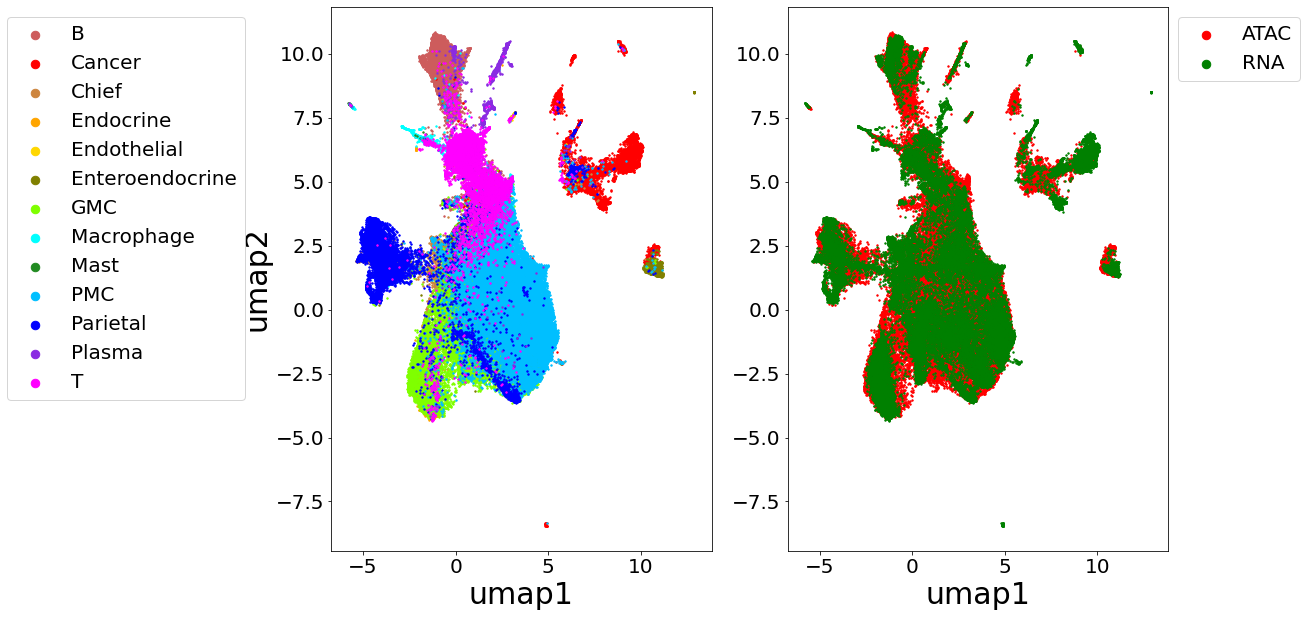

In [22]:
# data_pca=PCA(n_components=30).fit_transform(scidrl.data.values)
# umap_mat=umap.UMAP().fit_transform(data_pca)
umap_mat=umap.UMAP().fit_transform(embed[:,params.znoise_dim:])
meta=scidrl.meta
celltype=meta.loc[:,'celltype'].values
batch=meta.loc[:,'batch'].values
labels=np.unique(celltype)
tech=np.unique(batch)
# tech=['Villani']
colour1=["indianred","red","peru","orange","gold","olive","chartreuse","cyan","forestgreen","deepskyblue","blue",
        "blueviolet","fuchsia","purple","deeppink","pink",'black','brown','chocolate','orangered','sandybrown','green',
        'violet','crimson','olivedrab']
colour2=['r','g','black','cyan','blue','purple','gold','grey','gold','lime','darkorange','lawngreen','lime','deepskyblue','teal']
fig,axs=plt.subplots(1,2,figsize=(15,10))
size=2
for i in range(len(labels)):
    axs[0].scatter(umap_mat[np.where(celltype==labels[i])[0],0],umap_mat[np.where(celltype==labels[i])[0],1],c=colour1[i],s=size)
axs[0].set_xlabel("umap1",fontsize=30)
axs[0].set_ylabel("umap2",fontsize=30)
axs[0].legend(labels,fontsize=20,loc="best",markerscale=6, bbox_to_anchor=(-0.2,1))
axs[0].tick_params(axis='both', which='major', labelsize=20)
for i in np.arange(len(tech)):
    axs[1].scatter(umap_mat[np.where(batch==tech[i])[0],0],umap_mat[np.where(batch==tech[i])[0],1],c=colour2[i],s=size)
axs[1].set_xlabel("umap1",fontsize=30)
axs[1].legend(tech,fontsize=20,loc="best",markerscale=6, bbox_to_anchor=(1,1))
axs[1].tick_params(axis='both', which='major', labelsize=20)

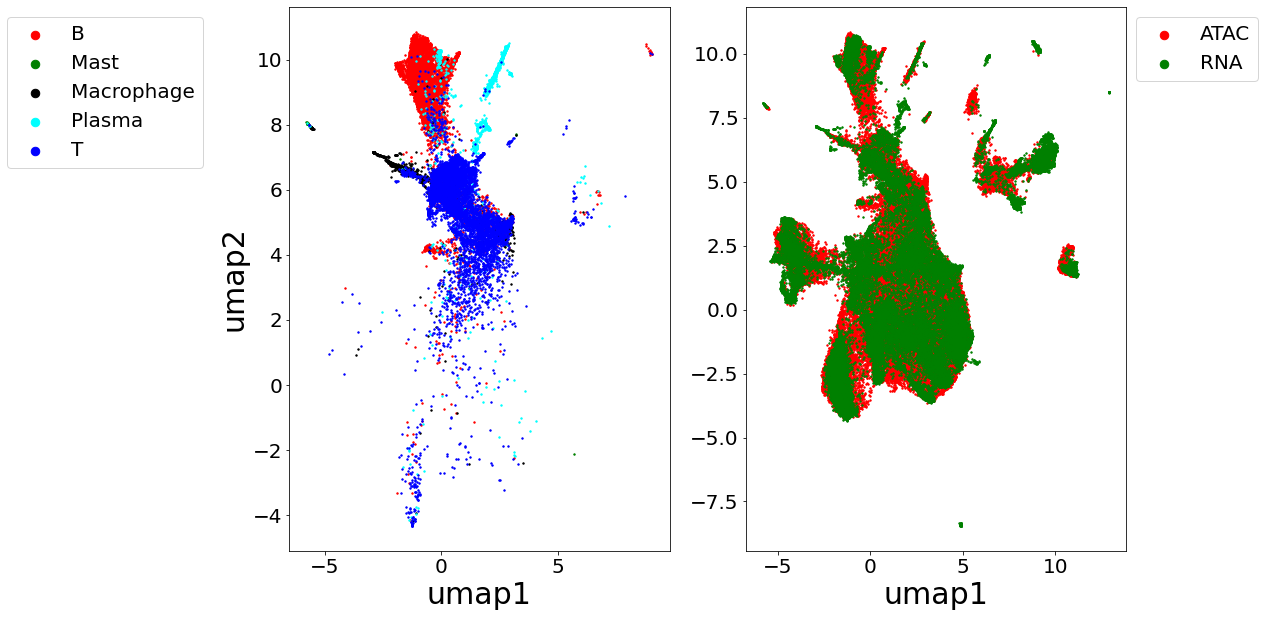

In [25]:
labels=['B','Mast','Macrophage','Plasma', 'T','Endothelial']
fig,axs=plt.subplots(1,2,figsize=(15,10))
size=2
for i in range(len(labels)):
    axs[0].scatter(umap_mat[np.where(celltype==labels[i])[0],0],umap_mat[np.where(celltype==labels[i])[0],1],c=colour2[i],s=size)
axs[0].set_xlabel("umap1",fontsize=30)
axs[0].set_ylabel("umap2",fontsize=30)
axs[0].legend(labels,fontsize=20,loc="best",markerscale=6, bbox_to_anchor=(-0.2,1))
axs[0].tick_params(axis='both', which='major', labelsize=20)
for i in np.arange(len(tech)):
    axs[1].scatter(umap_mat[np.where(batch==tech[i])[0],0],umap_mat[np.where(batch==tech[i])[0],1],c=colour2[i],s=size)
axs[1].set_xlabel("umap1",fontsize=30)
axs[1].legend(tech,fontsize=20,loc="best",markerscale=6, bbox_to_anchor=(1,1))
axs[1].tick_params(axis='both', which='major', labelsize=20)

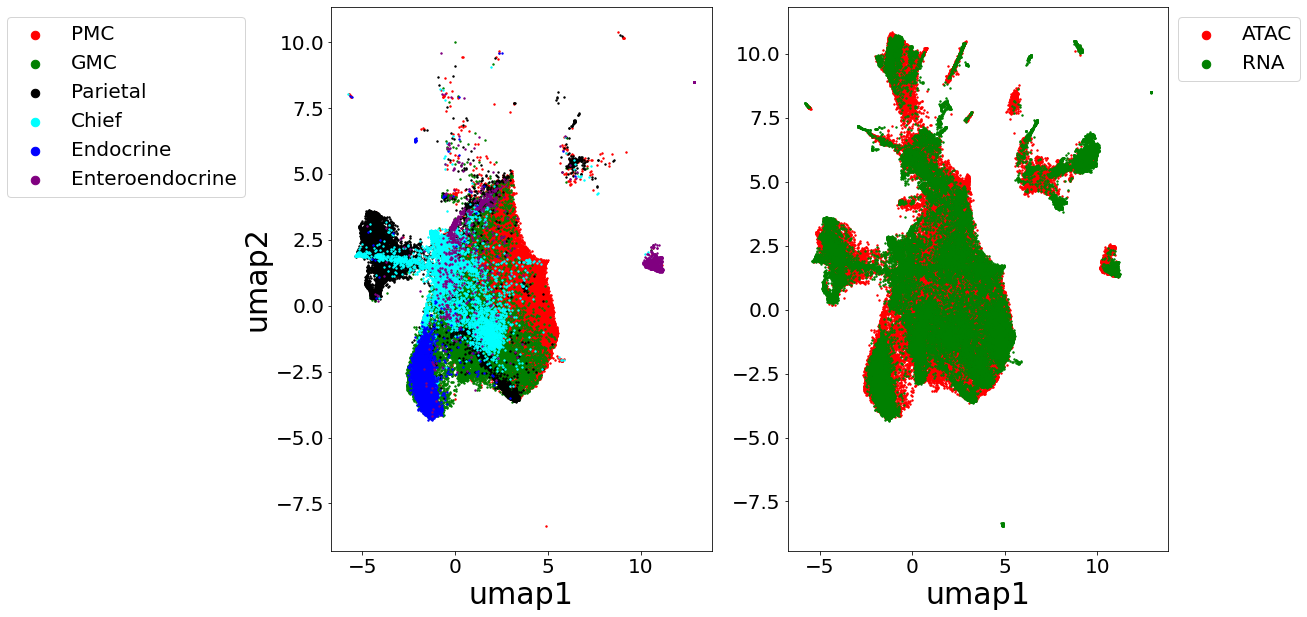

In [26]:
labels=['PMC','GMC','Parietal','Chief', 'Endocrine','Enteroendocrine']
fig,axs=plt.subplots(1,2,figsize=(15,10))
size=2
for i in range(len(labels)):
    axs[0].scatter(umap_mat[np.where(celltype==labels[i])[0],0],umap_mat[np.where(celltype==labels[i])[0],1],c=colour2[i],s=size)
axs[0].set_xlabel("umap1",fontsize=30)
axs[0].set_ylabel("umap2",fontsize=30)
axs[0].legend(labels,fontsize=20,loc="best",markerscale=6, bbox_to_anchor=(-0.2,1))
axs[0].tick_params(axis='both', which='major', labelsize=20)
for i in np.arange(len(tech)):
    axs[1].scatter(umap_mat[np.where(batch==tech[i])[0],0],umap_mat[np.where(batch==tech[i])[0],1],c=colour2[i],s=size)
axs[1].set_xlabel("umap1",fontsize=30)
axs[1].legend(tech,fontsize=20,loc="best",markerscale=6, bbox_to_anchor=(1,1))
axs[1].tick_params(axis='both', which='major', labelsize=20)

In [24]:
np.unique(celltype)

array(['B', 'Cancer', 'Chief', 'Endocrine', 'Endothelial',
       'Enteroendocrine', 'GMC', 'Macrophage', 'Mast', 'PMC', 'Parietal',
       'Plasma', 'T'], dtype=object)

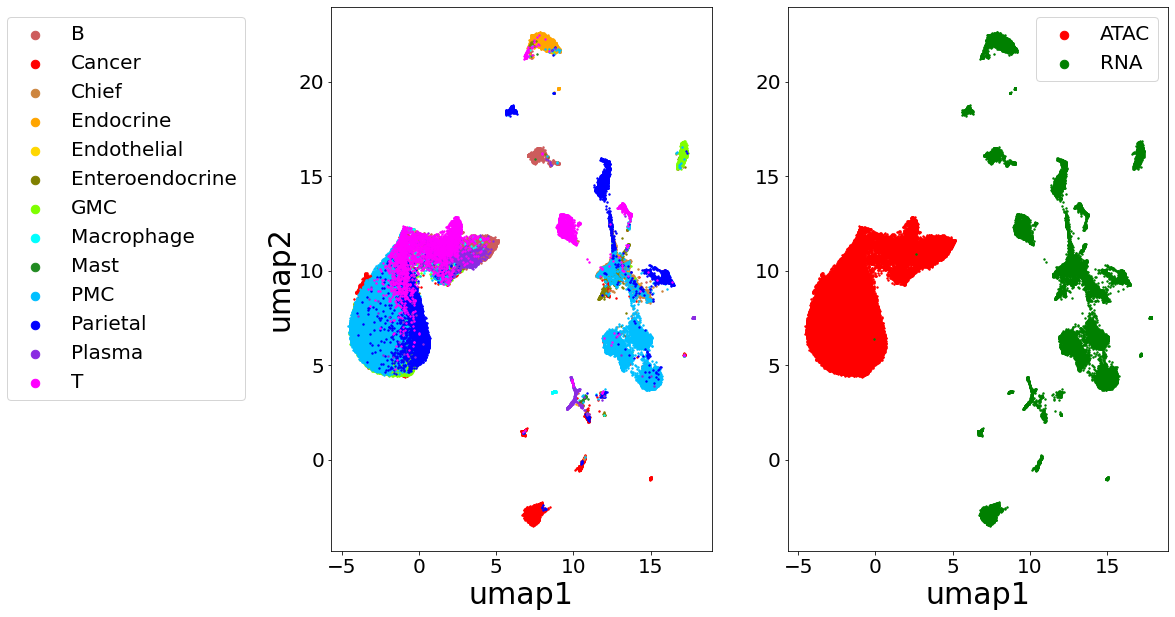

In [21]:
# data=pd.read_csv(data_file,header=0,index_col=0)
# data_pca=PCA(n_components=30).fit_transform(data.values)
# umap_mat=umap.UMAP().fit_transform(data_pca)
# umap_mat=umap.UMAP().fit_transform(embed[:,params.znoise_dim:])
meta=pd.read_csv(meta_file,header=0,index_col=0)
meta=meta.loc[data.index,:]
celltype=meta.loc[:,'celltype'].values
batch=meta.loc[:,'batch'].values
labels=np.unique(celltype)
tech=np.unique(batch)
# tech=['Villani']
colour1=["indianred","red","peru","orange","gold","olive","chartreuse","cyan","forestgreen","deepskyblue","blue",
        "blueviolet","fuchsia","purple","deeppink","pink",'black','brown','chocolate','orangered','sandybrown','green',
        'violet','crimson','olivedrab']
colour2=['r','g','black','cyan','blue','purple','gold','grey','gold','lime','darkorange','lawngreen','lime','deepskyblue','teal']
fig,axs=plt.subplots(1,2,figsize=(15,10))
size=2
for i in range(len(labels)):
    axs[0].scatter(umap_mat[np.where(celltype==labels[i])[0],0],umap_mat[np.where(celltype==labels[i])[0],1],c=colour1[i],s=size)
axs[0].set_xlabel("umap1",fontsize=30)
axs[0].set_ylabel("umap2",fontsize=30)
axs[0].legend(labels,fontsize=20,loc="best",markerscale=6, bbox_to_anchor=(-0.2,1))
axs[0].tick_params(axis='both', which='major', labelsize=20)
for i in np.arange(len(tech)):
    axs[1].scatter(umap_mat[np.where(batch==tech[i])[0],0],umap_mat[np.where(batch==tech[i])[0],1],c=colour2[i],s=size)
axs[1].set_xlabel("umap1",fontsize=30)
axs[1].legend(tech,fontsize=20,loc="best",markerscale=6, bbox_to_anchor=(1,1))
axs[1].tick_params(axis='both', which='major', labelsize=20)

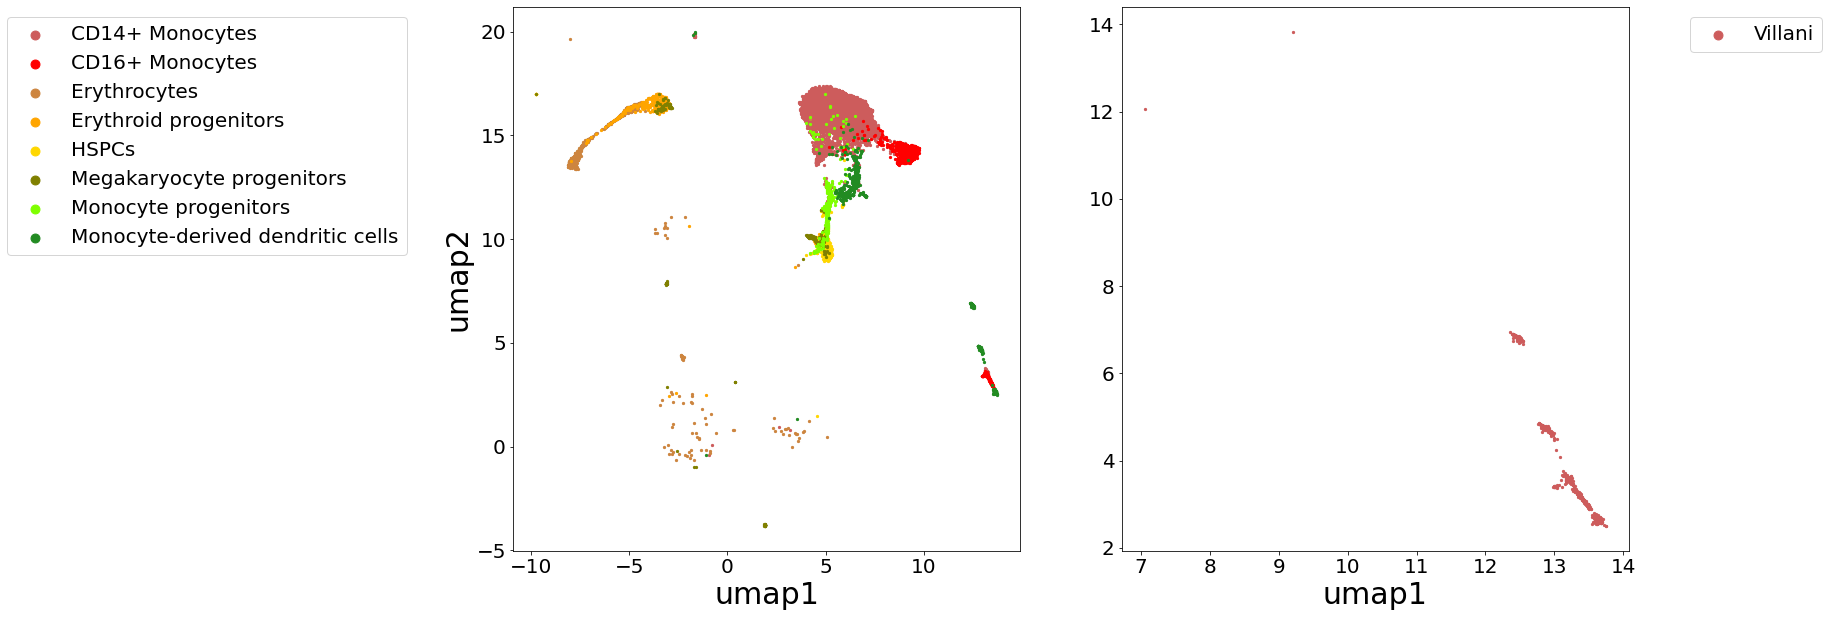

In [32]:
immune=['B_cell','CD34_progenitor','NK_cell','T_cell', 'dendritic_cell','macrophage_cell', 'mast_cell', 'monocyte_cell','plasma_cell']
organ_shared=immune+['Blood_vessel','Erythroid_Cells','Lymph_vessel','Pericyte', 'Platelet', 'Stroma','endothelial_cell','fibroblast_cell']
organ_specific=['kidney_cell', 'liver_cell', 'lung_cell', 'oesophagus_cell','pancreas_cell',]
rare=['epsilon','mast','schwann','t_cell']
cells=['Cortical NPCs','GE NPCs','Non-telencephalon NPCs']
cells=[ 'CD14+ Monocytes','CD16+ Monocytes','Monocyte progenitors','Monocyte-derived dendritic cells',
        'HSPCs','Megakaryocyte progenitors','Erythroid progenitors','Erythrocytes']

idx=[]
for i in cells:
    idx+=np.where(celltype==i)[0].tolist()
umap_mat1=umap_mat[idx,:]
celltype1=celltype[idx]
batch1=batch[idx]
colour=["indianred","red","peru","orange","gold","olive","chartreuse","forestgreen","cyan","deepskyblue","blue",
        "blueviolet","fuchsia","purple","deeppink","pink",'black','brown','chocolate','orangered','sandybrown','green','violet','crimson','olivedrab',
       'peru']
colour1=['black','brown','red','deepskyblue','chocolate','sandybrown','green','orange',"deeppink"]
f, axs= plt.subplots(1,2,figsize=(20,10))
size=5
ul=np.unique(celltype1)
ub=np.unique(batch1)
ub=['Villani']
# ub=['Kidney', 'Liver', 'Lung','Pancreas_baron', 'Spleen', 'Oesophagus', 'PBMC_Seq-Well' ]
for i in range(len(ul)):
    axs[0].scatter(umap_mat1[np.where(celltype1==ul[i])[0],0],umap_mat1[np.where(celltype1==ul[i])[0],1],c=colour[i],s=size)

axs[0].set_xlabel("umap1",fontsize=30)
axs[0].set_ylabel("umap2",fontsize=30)
axs[0].legend(ul,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(-0.19,1))
axs[0].tick_params(axis='both', which='major', labelsize=20)
for i in range(len(ub)):
    axs[1].scatter(umap_mat1[np.where(batch1==ub[i])[0],0],umap_mat1[np.where(batch1==ub[i])[0],1],c=colour[i],s=size)
axs[1].set_xlabel("umap1",fontsize=30)
axs[1].legend(ub,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(1.4,1))
axs[1].tick_params(axis='both', which='major', labelsize=20)

In [31]:
ub

array(['10X', 'Freytag', 'Oetjen_A', 'Oetjen_P', 'Oetjen_U',
       'Sun_sample1_CS', 'Sun_sample2_KC', 'Sun_sample3_TB',
       'Sun_sample4_TC', 'Villani'], dtype=object)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/home/tguo/tguo2/miniconda3/envs/tf2x/lib/python3.6/site-packages/keras/engine/training_utils.py:819: UserWarning: Output myCustomLossLayerReconstruction missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to myCustomLossLayerReconstruction.
  'be expecting any data to be passed to {0}.'.format(name))
/home/tguo/tguo2/miniconda3/envs/tf2x/lib/python3.6/site-packages/keras/engine/training_utils.py:819: UserWarning: Output myCoustomLossLayerClassifier missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to myCoustomLossLayerClassifier.
  'be expecting any data to be passed to {0}.'.format(name))
/home/tguo/tguo2/miniconda3/envs/tf2x/lib/python3.6/site-packages/keras/engine/training_utils.py:819: UserWarning: Output myCoustomLossLayerAdversarial missing from loss dictionary. We assume this was done on purpose. The fit and ev

Epoch 1/500
 - 3s - loss: 517.4509
Epoch 2/500
 - 2s - loss: 363.1625
Epoch 3/500
 - 2s - loss: 354.2419
Epoch 4/500
 - 2s - loss: 350.4690
Epoch 5/500
 - 2s - loss: 348.2647
Epoch 6/500
 - 2s - loss: 346.4872
Epoch 7/500
 - 2s - loss: 345.0500
Epoch 8/500
 - 2s - loss: 344.8076
Epoch 9/500
 - 2s - loss: 344.1732
Epoch 10/500
 - 2s - loss: 343.0807
Epoch 11/500
 - 2s - loss: 342.4271
Epoch 12/500
 - 2s - loss: 342.2684
Epoch 13/500
 - 2s - loss: 341.6582
Epoch 14/500
 - 2s - loss: 341.0721
Epoch 15/500
 - 2s - loss: 340.6594
Epoch 16/500
 - 2s - loss: 340.3746
Epoch 17/500
 - 2s - loss: 339.9950
Epoch 18/500
 - 2s - loss: 339.4103
Epoch 19/500
 - 2s - loss: 339.3825
Epoch 20/500
 - 2s - loss: 339.0932
Epoch 21/500
 - 2s - loss: 338.8398
Epoch 22/500
 - 2s - loss: 338.5500
Epoch 23/500
 - 2s - loss: 338.4493
Epoch 24/500
 - 2s - loss: 338.2529
Epoch 25/500
 - 2s - loss: 337.7728
Epoch 26/500
 - 2s - loss: 337.6877
Epoch 27/500
 - 2s - loss: 337.6457
Epoch 28/500
 - 2s - loss: 337.5773
E

 - 2s - loss: 330.3641
Epoch 226/500
 - 2s - loss: 330.3241
Epoch 227/500
 - 2s - loss: 330.2557
Epoch 228/500
 - 2s - loss: 330.2873
Epoch 229/500
 - 2s - loss: 330.3406
Epoch 230/500
 - 2s - loss: 330.2327
Epoch 231/500
 - 2s - loss: 330.2347
Epoch 232/500
 - 2s - loss: 330.2264
Epoch 233/500
 - 2s - loss: 330.2541
Epoch 234/500
 - 2s - loss: 330.2025
Epoch 235/500
 - 2s - loss: 330.2018
Epoch 236/500
 - 2s - loss: 330.2322
Epoch 237/500
 - 2s - loss: 330.1807
Epoch 238/500
 - 2s - loss: 330.2438
Epoch 239/500
 - 2s - loss: 330.2084
Epoch 240/500
 - 2s - loss: 330.1547
Epoch 241/500
 - 2s - loss: 330.1814
Epoch 242/500
 - 2s - loss: 330.1890
Epoch 243/500
 - 2s - loss: 330.1505
Epoch 244/500
 - 2s - loss: 330.1149
Epoch 245/500
 - 2s - loss: 330.1884
Epoch 246/500
 - 2s - loss: 330.1262
Epoch 247/500
 - 2s - loss: 330.1166
Epoch 248/500
 - 2s - loss: 330.1622
Epoch 249/500
 - 2s - loss: 330.0633
Epoch 250/500
 - 2s - loss: 330.0706
Epoch 251/500
 - 2s - loss: 330.0984
Epoch 252/500
 

Epoch 447/500
 - 2s - loss: 329.0693
Epoch 448/500
 - 2s - loss: 328.9583
Epoch 449/500
 - 2s - loss: 329.1026
Epoch 450/500
 - 2s - loss: 329.0180
Epoch 451/500
 - 2s - loss: 328.9753
Epoch 452/500
 - 2s - loss: 329.1026
Epoch 453/500
 - 2s - loss: 329.0190
Epoch 454/500
 - 2s - loss: 329.0117
Epoch 455/500
 - 2s - loss: 328.9705
Epoch 456/500
 - 2s - loss: 328.9740
Epoch 457/500
 - 2s - loss: 329.0547
Epoch 458/500
 - 2s - loss: 329.0277
Epoch 459/500
 - 2s - loss: 329.0448
Epoch 460/500
 - 2s - loss: 329.0083
Epoch 461/500
 - 2s - loss: 328.9927
Epoch 462/500
 - 2s - loss: 329.0033
Epoch 463/500
 - 2s - loss: 328.9543
Epoch 464/500
 - 2s - loss: 328.9836
Epoch 465/500
 - 2s - loss: 328.9972
Epoch 466/500
 - 2s - loss: 328.9189
Epoch 467/500
 - 2s - loss: 328.9058
Epoch 468/500
 - 2s - loss: 328.9153
Epoch 469/500
 - 2s - loss: 328.9170
Epoch 470/500
 - 2s - loss: 329.0007
Epoch 471/500
 - 2s - loss: 328.9542
Epoch 472/500
 - 2s - loss: 328.8638
Epoch 473/500
 - 2s - loss: 329.0011
E

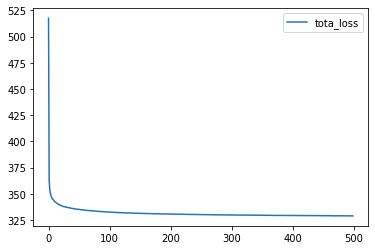

In [4]:
K.clear_session()

epoch=500
latent=16
class_dim=2
batch_size=100
lr=0.001
beta=0
gamma=1
alpha=1
fg_lambda=5
acts='softmax'
inputs=np.hstack((data1,batch1,np.zeros((data1.shape[0],latent))))

model=SCIDRL(data1.shape[1],batch1.shape[1],latent,class_dim,lr,gamma,alpha,fg_lambda,acts)
model.build()
myhistory=History()
loss_=model.my_model.fit(x=inputs,epochs=epoch,batch_size=batch_size,shuffle=True,verbose=2,callbacks=[myhistory])
total_loss=loss_.history['loss']
###loss 
for v in myhistory.history.values():
    plt.plot(v)
plt.plot(total_loss)
plt.legend(list(myhistory.history.keys())+['tota_loss'], loc='upper right')
plt.show()
###latent code
inputs_test=np.hstack((data1,batch1,np.zeros((data1.shape[0],latent))))
embed=model.my_result.predict(inputs_test)[0]
a=np.hstack((np.zeros((data1.shape[0],class_dim)),embed[:,class_dim:]))
inputs_test_1=np.hstack((data1,batch1,a))
correct=model.my_result.predict(inputs_test_1)[1]
#     np.savetxt("/data02/tguo/batch_effect/cell_lines/data_"+str(j)+"_scidr.txt",latent_code_mean,fmt="%.5f")

In [5]:
plt.plot(v)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/tguo/tguo2/miniconda3/envs/tf2x/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2878, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-523299fd4913>", line 1, in <module>
    plt.plot(v)
NameError: name 'v' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/tguo/tguo2/miniconda3/envs/tf2x/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/tguo/tguo2/miniconda3/envs/tf2x/lib/python3.6/site-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File 

NameError: name 'v' is not defined

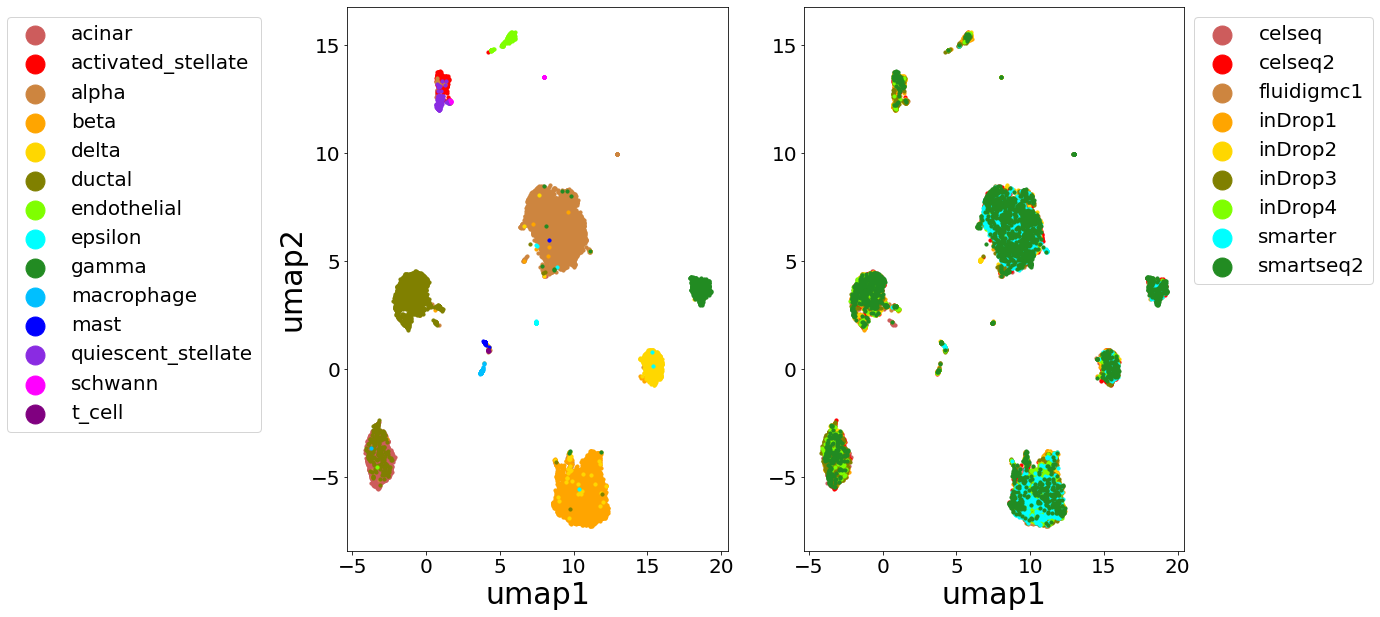

In [11]:
# umap_mat=umap.UMAP().fit_transform(embed[:,class_dim:])
labels=np.unique(celltype)
tech=np.unique(batch)
colour1=["indianred","red","peru","orange","gold","olive","chartreuse","cyan","forestgreen","deepskyblue","blue",
        "blueviolet","fuchsia","purple","deeppink","pink",'black','brown','chocolate','orangered','sandybrown','green',
        'violet','crimson','olivedrab']
colour2=['r','g','black','cyan','blue','purple','gold','grey','gold','lime','darkorange','lawngreen','lime','deepskyblue','teal']
fig,axs=plt.subplots(1,2,figsize=(15,10))
size=10
for i in range(len(labels)):
    axs[0].scatter(umap_mat[np.where(celltype==labels[i])[0],0],umap_mat[np.where(celltype==labels[i])[0],1],c=colour1[i],s=size)
axs[0].set_xlabel("umap1",fontsize=30)
axs[0].set_ylabel("umap2",fontsize=30)
axs[0].legend(labels,fontsize=20,loc="best",markerscale=6, bbox_to_anchor=(-0.2,1))
axs[0].tick_params(axis='both', which='major', labelsize=20)
for i in np.arange(len(tech)):
    axs[1].scatter(umap_mat[np.where(batch==tech[i])[0],0],umap_mat[np.where(batch==tech[i])[0],1],c=colour1[i],s=size)
axs[1].set_xlabel("umap1",fontsize=30)
axs[1].legend(tech,fontsize=20,loc="best",markerscale=6, bbox_to_anchor=(1,1))
axs[1].tick_params(axis='both', which='major', labelsize=20)